chisq is  15267.937150261656  for  2501  degrees of freedom.


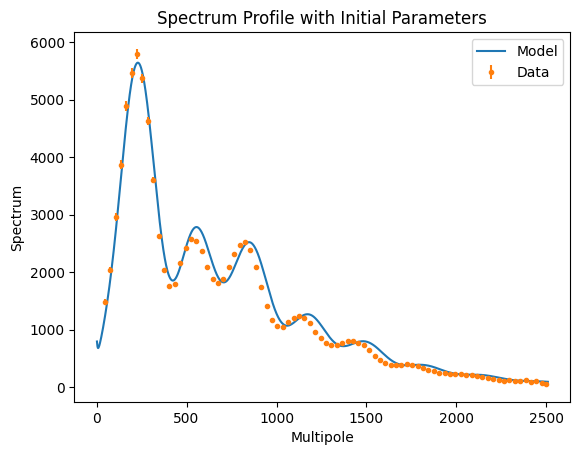

In [233]:
##############Assignment 5#################
###########################################


#################Part 1#################
#Parts of the code in this assignment were adapted from the lecture notes.


import numpy as np
import camb
from matplotlib import pyplot as plt
import time

#########Following is based on planck_likelihood.py.

def get_spectrum(pars,lmax=3000):
    #print('pars are ',pars)
    H0=pars[0]
    ombh2=pars[1]
    omch2=pars[2]
    tau=pars[3]
    As=pars[4]
    ns=pars[5]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]    #you could return the full power spectrum here if you wanted to do say EE
    return tt[2:][:2507]


plt.ion()

pars=np.asarray([60,0.02,0.1,0.05,2.00e-9,1.0])
planck=np.loadtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',skiprows=1)
ell=planck[:,0]
spec=planck[:,1]
errs=0.5*(planck[:,2]+planck[:,3]);
model=get_spectrum(pars)
model=model[:len(spec)]
resid=spec-model
chisq=np.sum( (resid/errs)**2)
print("chisq is ",chisq," for ",len(resid)-len(pars)," degrees of freedom.")
#read in a binned version of the Planck PS for plotting purposes
planck_binned=np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt',skiprows=1)
errs_binned=0.5*(planck_binned[:,2]+planck_binned[:,3]);
plt.clf()
plt.plot(ell,model, label='Model')
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.', label='Data')
plt.xlabel('Multipole')
plt.ylabel('Spectrum')
plt.title('Spectrum Profile with Initial Parameters')
plt.legend()
plt.show()


#########



chisq is  3272.205355920218  for  2501  degrees of freedom.


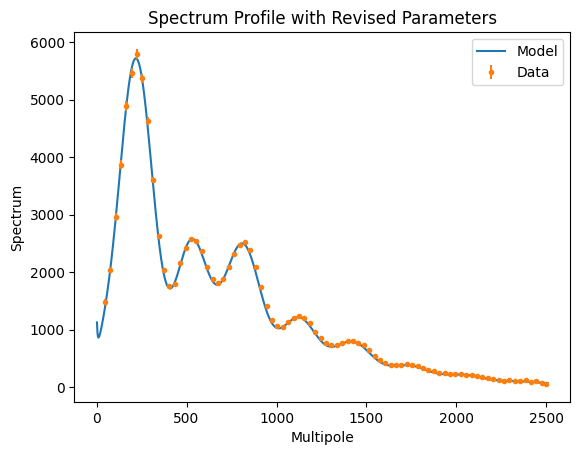

70.7248188403477
Reference chiqsq mean=2501, variance=5002, stdev=70.7248188403477


In [234]:
#########Chi-squared analysis with parameters of [69, 0.022, 0.12, 0.06, 2.1e-9, 0.95]
pars=np.asarray([69, 0.022, 0.12, 0.06, 2.1e-9, 0.95])
model=get_spectrum(pars)
model=model[:len(spec)]
resid=spec-model
chisq=np.sum( (resid/errs)**2)
print("chisq is ",chisq," for ",len(resid)-len(pars)," degrees of freedom.")
#read in a binned version of the Planck PS for plotting purposes
planck_binned=np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt',skiprows=1)
errs_binned=0.5*(planck_binned[:,2]+planck_binned[:,3]);
plt.clf()
plt.plot(ell,model,label='Model')
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.',label='Data')
plt.xlabel('Multipole')
plt.ylabel('Spectrum')
plt.title('Spectrum Profile with Revised Parameters')
plt.legend()
plt.show()
#########
#Degrees of freedom basic statistics
dof=2501 
vardof=2*dof
stdevdof=np.sqrt(vardof)
print(stdevdof)
print("Reference chiqsq mean=" + str(dof) + ", variance=" +str(vardof)+", stdev="+str(stdevdof))
######### 


In [72]:
#################Part 2#################

#Newton's method to calculate best fit parameters
def fitnewton(fun, pars, dp, spec, ell):
    iter_no=20;#specify number of iterations for fit
    ellen=len(ell)
    parlen=len(pars)
    ainv=np.diag(1/errs**2)

    for i in range(iter_no):
        mspec=fun(pars)
        M=np.empty([ellen,parlen])
        for i in range(len(pars)):
            p1=pars.copy()
            p2=pars.copy()
            p1[i]=pars[i]-dp[i]
            p2[i]=pars[i]+dp[i]
            y1=fun(p1)
            y2=fun(p2)
            M[:,i]=(y2-y1)/(2*dp[i])
            
        res=spec-mspec
        lhs=np.linalg.inv(M.T@ainv@M)
        rhs=M.T@ainv@res
        dp=lhs@rhs
        pars=pars+dp
        print(dp)

    perr=np.sqrt((np.diag(lhs))) # parameter errors
    return pars, perr, lhs

pars3=pars # Starting point of estimation [69, 0.022, 0.12, 0.06, 2.1e-9, 0.95]

dp=np.array([1e-1, 1e-4, 1e-3, 1e-3, 1e-11, 1e-2]) # step size ~1% of pars

parfit=fitnewton(get_spectrum, pars3, dp, spec, ell) #perform Newton's fit

print('Parameters ', parfit[0])
print('Errors ', parfit[1])


[-5.84206696e-01  3.79097761e-04 -2.80526580e-03  5.09156920e-02
  2.20284999e-10  2.47420069e-02]
[-3.21745719e-01 -3.31955863e-05  7.99548778e-04 -3.13826448e-02
 -1.28664166e-10 -2.58640967e-03]
[ 1.76688615e-01  2.17464842e-05 -3.90066460e-04  7.25414062e-03
  3.31366666e-11  1.03891555e-03]
[-4.74954601e-02 -6.70722495e-06  1.04450785e-04 -2.27421828e-03
 -9.28879901e-12 -2.44626295e-04]
[ 1.63757996e-02  2.19459822e-06 -3.60341674e-05  6.84875780e-04
  2.84562902e-12  8.60261204e-05]
[-3.59649021e-03 -5.20621930e-07  7.08210887e-06 -1.73126551e-04
 -7.27444431e-13 -1.82461462e-05]
[ 4.84383292e-03  1.18489781e-06 -8.20750130e-06  1.34477935e-04
  5.55793428e-13  2.03542513e-05]
[-9.98930484e-03 -1.51587451e-06  2.14422867e-05 -4.12566658e-04
 -1.70782292e-12 -5.23373165e-05]
[ 4.56874453e-02  5.56605184e-06 -1.03309831e-04  1.01235013e-03
  3.91723160e-12  2.34015550e-04]
[-4.66286540e-02 -6.14688109e-06  1.03977939e-04 -9.89355851e-04
 -3.81578788e-12 -2.34262930e-04]
[ 7.544899

chisq is  2576.1522599860755  for  2501  degrees of freedom.


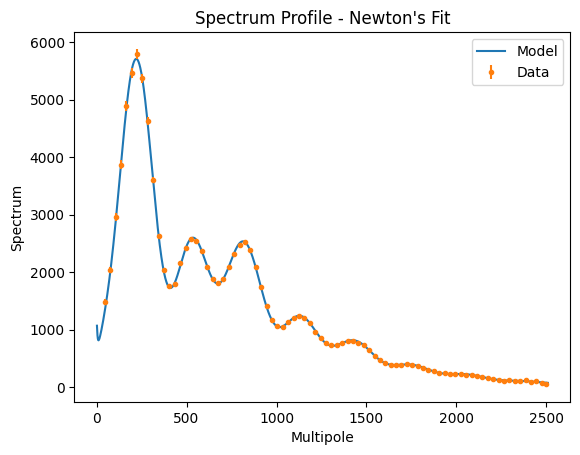

In [244]:
model2=get_spectrum(parfit[0])
resid=spec-model2
chisq=np.sum( (resid/errs)**2)
print("chisq is ",chisq," for ",len(resid)-len(parfit[0])," degrees of freedom.")
plt.clf()
plt.plot(ell,model2, label='Model')
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.', label='Data')
plt.xlabel('Multipole')
plt.ylabel('Spectrum')
plt.legend()
plt.title('Spectrum Profile - Newton\'s Fit')
#save results
#Parameter names

paranamesave= ['Ho','Obh2','Och2', 'T', 'As', 'ns']
pfile='planck_fit_params.txt'
np.savetxt(pfile,np.column_stack([paranamesave,parfit[0],parfit[1]]),fmt='%s')

In [360]:
#Part 2 parameters and errors
for i in range(len(parfit[0])):
    print (paranamesave[i]+ ' = ' +format(parfit[0][i])+' \u00B1 ' + format(parfit[1][i]))

Ho = 68.23923468778483 ± 1.1879602154785234
Obh2 = 0.02236326610963597 ± 0.0002298075866754982
Och2 = 0.11767409591289223 ± 0.0026553303770938653
T = 0.08515268514861862 ± 0.03413002474937224
As = 2.2181269320863053e-09 ± 1.433773635618479e-10
ns = 0.973032426765984 ± 0.006580745981714714


In [272]:
#################Part 3#################

#MCMC functions
def lor_chisq(pars,x,y,noise=None):
    pred=get_spectrum(pars)
    if noise is None:
        return np.sum((y-pred)**2)
    else:
        return np.sum (((y-pred)/noise)**2)

def mcmc(pars,step_size,x,y,fun,nstep=10,noise=errs):
    chi_cur=fun(pars,x,y,noise)
    npar=len(pars)
    chain=np.zeros([nstep,npar])
    chivec=np.zeros(nstep)
    for i in range(nstep):
        trial_pars=pars+np.random.multivariate_normal(np.zeros(len(pars)), step_size)
        trial_chisq=fun(trial_pars,x,y,noise)
        delta_chisq=trial_chisq-chi_cur
        accept_prob=np.exp(-0.5*delta_chisq)
        accept=np.random.rand(1)<accept_prob
        if accept:
            pars=trial_pars
            chi_cur=trial_chisq
        chain[i,:]=pars
        chivec[i]=chi_cur
    return chain,chivec
#from part 2 best fit
# pars3 = parfit[0].copy()
parstart=np.array([69, 0.022, 0.12, 0.06, 2.1e-9, 0.95]) 
step_size=parfit[2].copy()


chain3p,chisq3p=mcmc(parstart,step_size,ell,spec,lor_chisq,nstep=5000)




In [306]:
#Part3 save results
pfile='planck_chain.txt'
np.savetxt(pfile,np.column_stack([chisq3p,chain3p]),fmt='%s')

In [274]:
#Dark Energy calculations
#remove first 1000 chain data
meanparsd=np.mean(chain3p[1000:], axis=0)#mean parameters
errparsd=np.std(chain3p[1000:], axis=0)#stdev parameters
h3=meanparsd[0]/100
darken=1-(meanparsd[1]/h3**2+meanparsd[2]/h3**2)
darkenerr=np.sqrt((1e4*meanparsd[1]/(meanparsd[0]**2))**2*((errparsd[1]/meanparsd[1])**2 +(2*errparsd[0]/meanparsd[0])**2)+
(1e4*meanparsd[2]/(meanparsd[0]**2))**2*((errparsd[2]/meanparsd[2])**2 +(2*errparsd[0]/meanparsd[0])**2))
darkenerr
print('Dark Energy = ' +format(darken) + ' +/- ' + format(darkenerr))



Dark Energy = 0.7001826114106732 +/- 0.009873515099749566


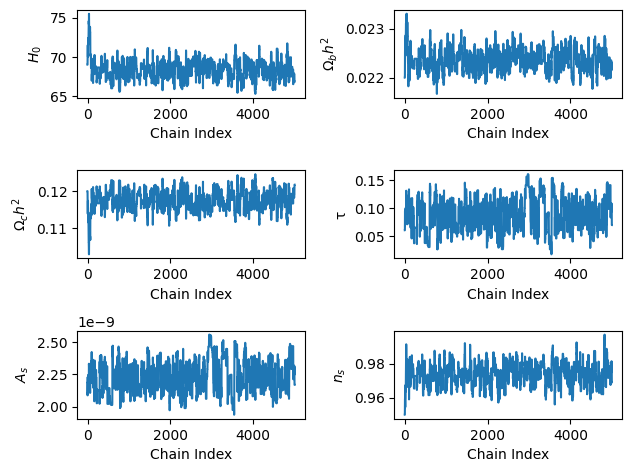

In [307]:
#Part 3 MCMC parameter plots

#Parameter names
paranames = ['$H_0$','$\u03A9_b$$h^2$','$\u03A9_c$$h^2$', '\u03C4', '$A_s$', '$n_s$']

for i in range(len(pars)):
    plt.subplot(3,2,i+1)
    plt.plot(chain3p[:,i])
    plt.xlabel('Chain Index')
    plt.ylabel('{}'.format(paranames[i]))
#     plt.legend()
#     plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout(pad=1.0)
# plt.title('MCMC - Parameters')
plt.show()

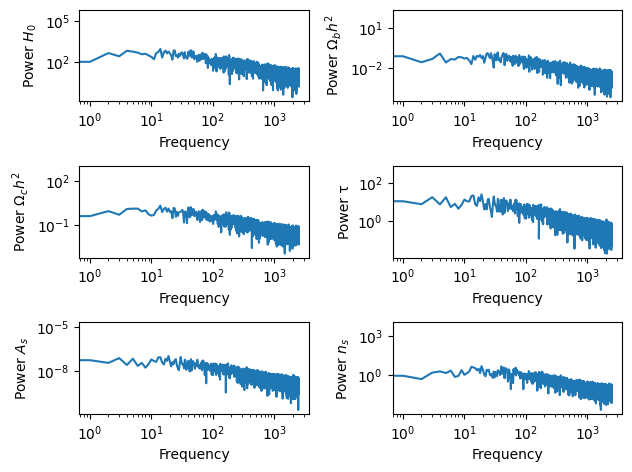

In [310]:
#Part 3 frequency domain plots
for i in range(len(pars)):
    plt.subplot(3,2,i+1)
    plt.loglog(np.abs(np.fft.rfft(chain3p[:,i])))
    plt.xlabel('Frequency')
    plt.ylabel('Power {}'.format(paranames[i]))
#     plt.legend()
#     plt.title('MCMC - parameter')
#     plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout(pad=1.0)
plt.show()

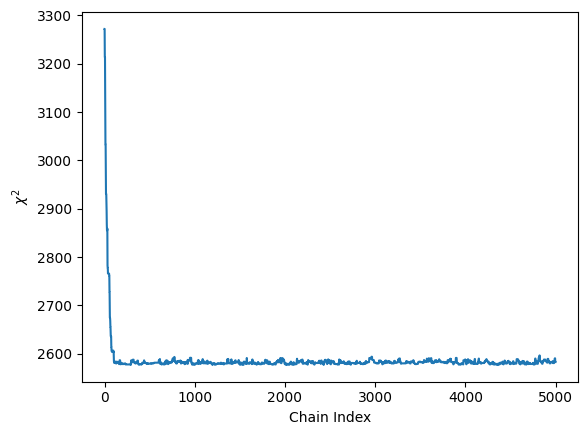

In [309]:
#Part 3 plot chisq 
plt.clf()
plt.plot(chisq3p)
plt.xlabel('Chain Index')
plt.ylabel('$\u03c7^2$')
plt.show()

chisq is  2577.8362875843386  for  2501  degrees of freedom.


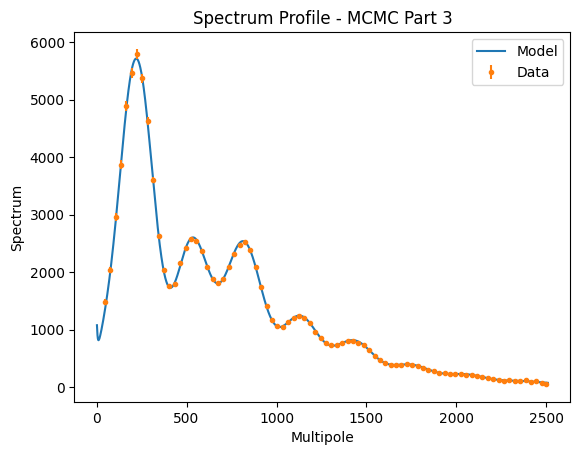

In [311]:
model3=get_spectrum(meanparsd)
resid3=spec-model3
chisq3=np.sum( (resid3/errs)**2)
print("chisq is ",chisq3," for ",len(resid)-len(parfit[0])," degrees of freedom.")
plt.clf()
plt.plot(ell,model3, label='Model')
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.', label='Data')
plt.xlabel('Multipole')
plt.ylabel('Spectrum')
plt.title('Spectrum Profile - MCMC Part 3')
plt.legend()
plt.show()
#save results
#Parameter names
# paranames = ['Ho','Obh2','Och2', 'T', 'As', 'ns']
# pfile='planck_fit_params.txt'
# np.savetxt(pfile,np.column_stack([paranames,parfit[0],parfit[1]]),fmt='%s')

In [359]:
#Part 3 parameters and errors
for i in range(len(meanparsd)):
    print (paranamesave[i]+ ' = ' +format(meanparsd[i])+' \u00B1 ' + format(errparsd[i]))

Ho = 68.31404231727065 ± 1.0993291806854792
Obh2 = 0.02236708578622572 ± 0.00020884311664313556
Och2 = 0.11755194429942985 ± 0.002521110125749427
T = 0.08936518675546093 ± 0.03040362473049353
As = 2.2395975368833685e-09 ± 1.2858698235144184e-10
ns = 0.9739238271638131 ± 0.0064101631032081885


In [338]:
#################Part 4#################

#calculate additional term to add to chisq
def dchisq(T):
    meanT=0.0540 
    errT=0.0074
    dchi=((T-meanT)/errT)**2
    return dchi

#calculate weighting factor for new covariance calculation
w=np.exp(-0.5*dchisq(chain3p[:,3]))

#new covariance matrix based on the weight
newcov = np.cov(chain3p.T, aweights=w)

#modified mcmc with T constraint and additional chisq term
def mcmcT(pars,step_size,x,y,fun,nstep=10,noise=errs):
    chi_cur=fun(pars,x,y,noise)
    npar=len(pars)
    chain=np.zeros([nstep,npar])
    chivec=np.zeros(nstep)
    for i in range(nstep):
 #       print(i)
#         trial_pars=pars+step_size*np.random.randn(npar)
        trial_pars=pars+np.random.multivariate_normal(np.zeros(len(pars)), step_size)
        trial_chisq=fun(trial_pars,x,y,noise)+dchisq(trial_pars[3])# add the additional chisq term
        delta_chisq=trial_chisq-chi_cur
        accept_prob=np.exp(-0.5*delta_chisq)
        accept=np.random.rand(1)<accept_prob
        if accept:
            pars=trial_pars
            chi_cur=trial_chisq
        chain[i,:]=pars
        chivec[i]=chi_cur
    return chain,chivec


parstart4=np.array([69, 0.022, 0.12, 0.054, 2.1e-9, 0.95])#starting parameters accounting for T=0.054
step_size4=newcov


chain4,chisq4p=mcmcT(parstart4,step_size4,ell,spec,lor_chisq,nstep=5000)

In [353]:
#Part4 save results
pfile='planck_chain_tauprior.txt'
np.savetxt(pfile,np.column_stack([chisq4p,chain4]),fmt='%s')

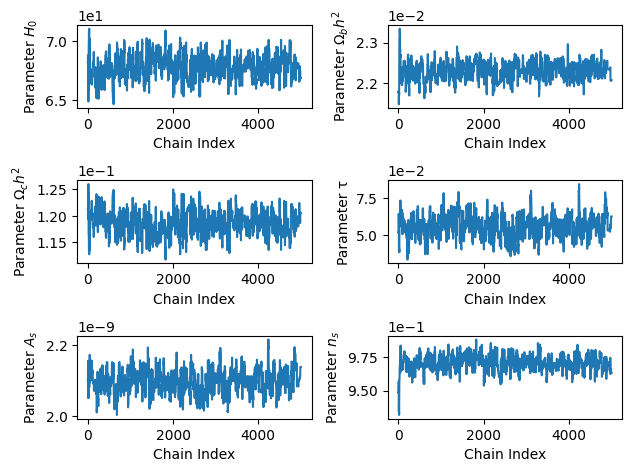

In [340]:
#Part 4 MCMC parameter plots
for i in range(len(pars)):
    plt.subplot(3,2,i+1)
    plt.plot(chain4[:,i])
    plt.xlabel('Chain Index')
    plt.ylabel('Parameter {}'.format(paranames[i]))
#     plt.legend()
#     plt.title('MCMC - parameter')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout(pad=1.0)
plt.show()

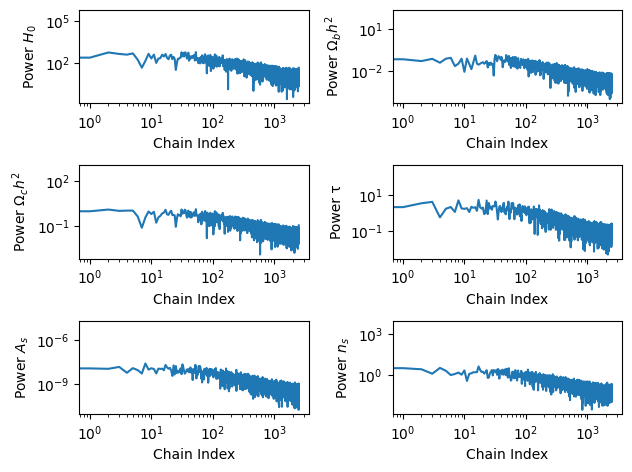

In [341]:
#Part 4 frequency domain plots
for i in range(len(pars)):
    plt.subplot(3,2,i+1)
    plt.loglog(np.abs(np.fft.rfft(chain4[:,i])))
    plt.xlabel('Chain Index')
    plt.ylabel('Power {}'.format(paranames[i]))
#     plt.legend()
#     plt.title('MCMC - parameter')
#     plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout(pad=1.0)
plt.show()

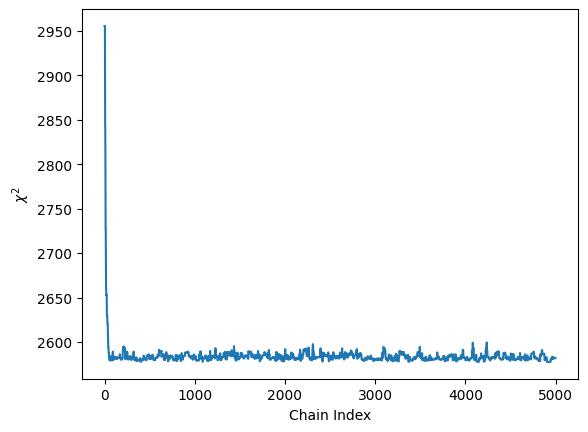

In [342]:
#Part 4 plot chisq
plt.clf()
plt.plot(chisq4p)
plt.xlabel('Chain Index')
plt.ylabel('$\u03c7^2$')
plt.show()

chisq is  2577.0468513490728  for  2501  degrees of freedom.


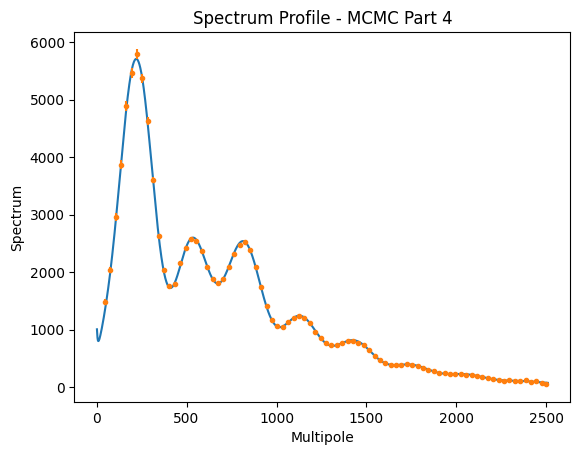

In [343]:
#Part 4 resultant parameters
meanparsd4=np.mean(chain4[10:], axis=0)#mean parameters
errparsd4=np.std(chain4[10:], axis=0)#stdev parameters
model4=get_spectrum(meanparsd4)
resid4=spec-model4
chisq4=np.sum( (resid4/errs)**2)
print("chisq is ",chisq4," for ",len(resid)-len(parfit[0])," degrees of freedom.")
plt.clf()
plt.plot(ell,model4)
plt.errorbar(planck_binned[:,0],planck_binned[:,1],errs_binned,fmt='.')
plt.xlabel('Multipole')
plt.ylabel('Spectrum')
plt.title('Spectrum Profile - MCMC Part 4')
plt.show()


In [358]:
#Part 4 T constrained parameters and errors
for i in range(len(meanparsd4)):
    print (paranamesave[i]+ ' = ' +format(meanparsd4[i])+' \u00B1 ' + format(errparsd4[i]))

Ho = 67.85832894684536 ± 0.9800055507349157
Obh2 = 0.022299136773529207 ± 0.00021448923125529147
Och2 = 0.11850980226963885 ± 0.002199383451617218
T = 0.05628363246610492 ± 0.007745738945772144
As = 2.098953090439339e-09 ± 3.322104042910329e-11
ns = 0.970793820449283 ± 0.005702525969930227


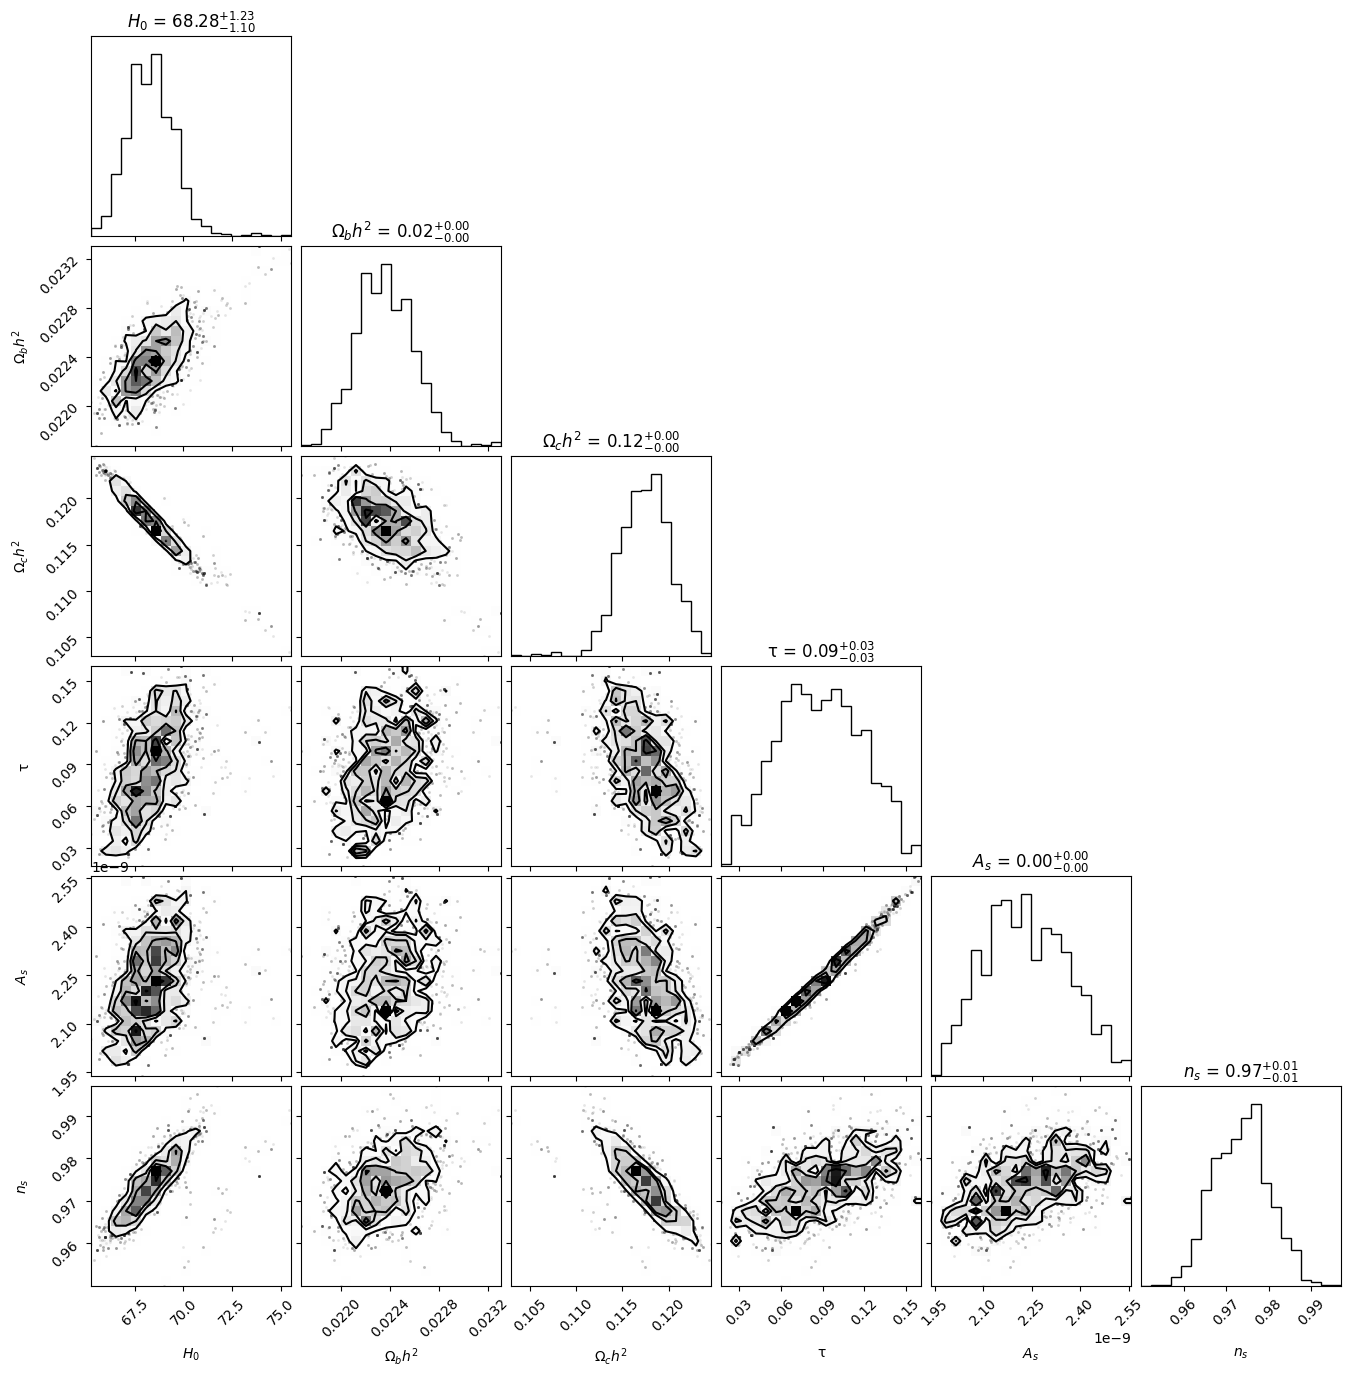

In [345]:
import corner
#Part 3 corner plots

plt.ioff()
corner.corner(chain3p, labels=paranames, show_titles=True)

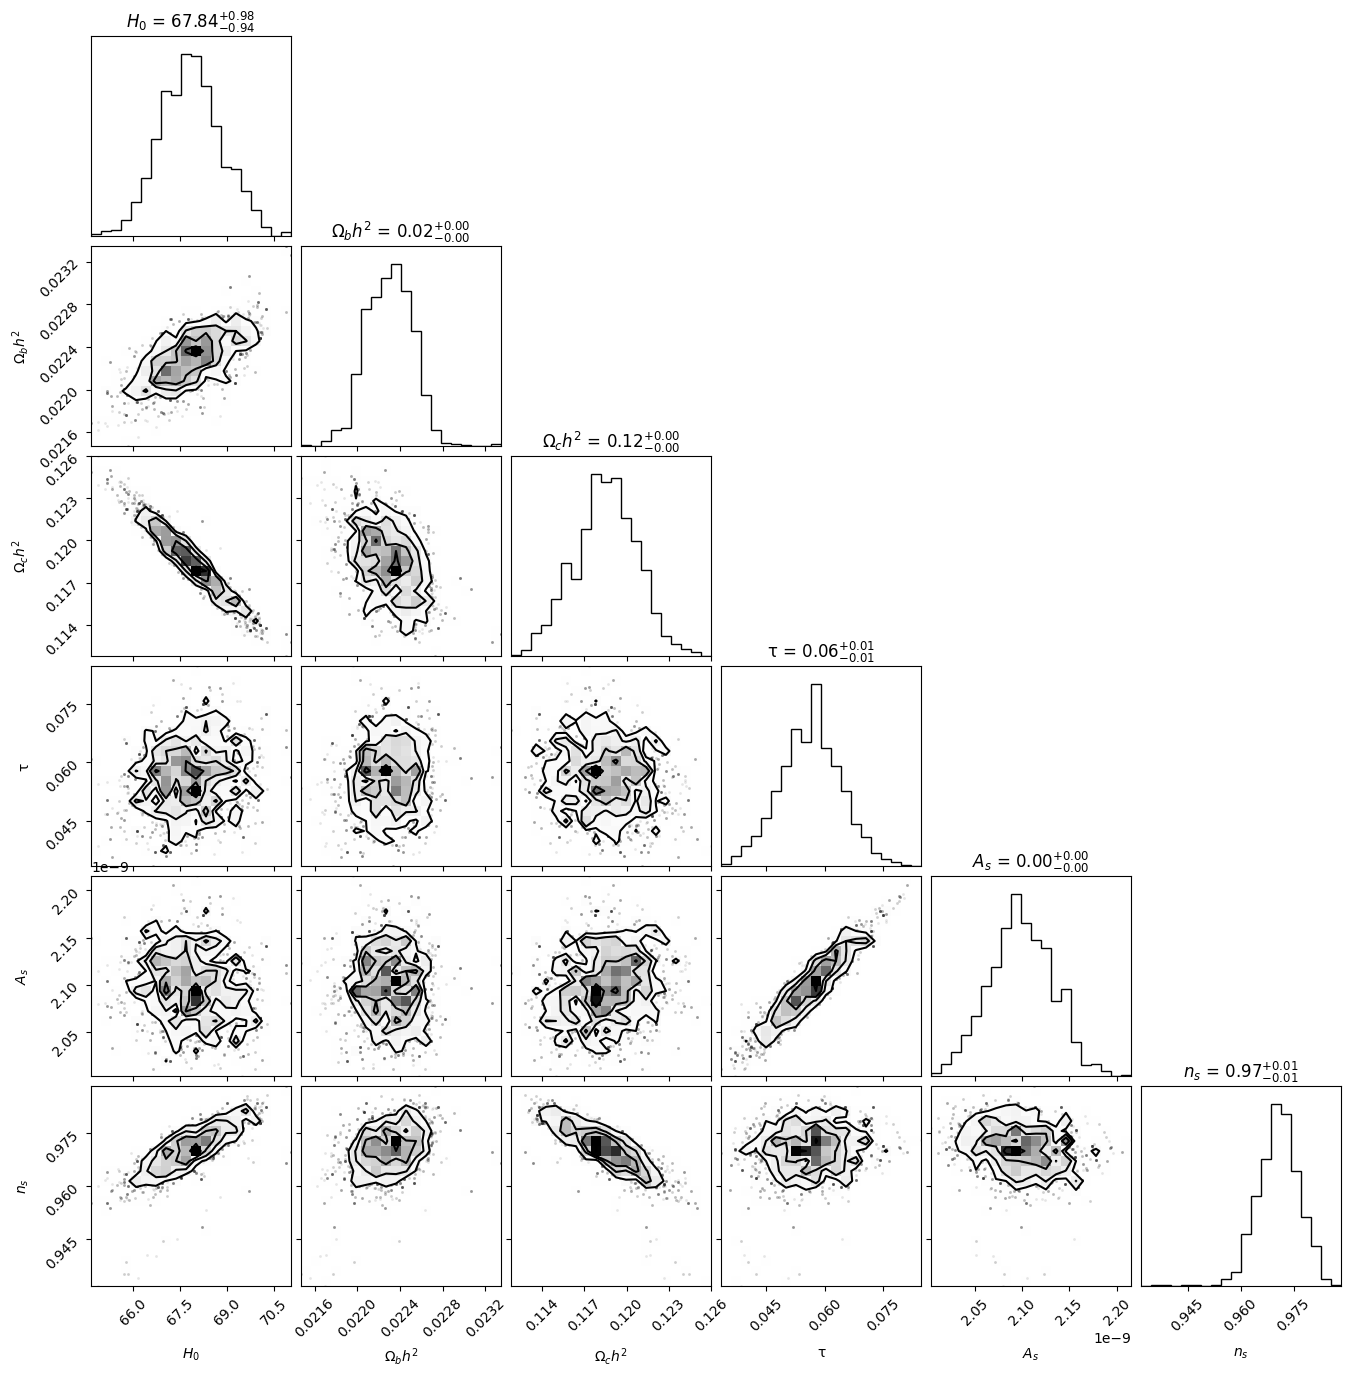

In [346]:
#Part 4 corner plots
figure=corner.corner(chain4)

plt.ioff()
corner.corner(chain4, labels=paranames, show_titles=True)

In [352]:
#part4 Bonus 2
bounds=np.array([meanparsd4-5*errparsd4, meanparsd4+5*errparsd4])
for i in range(len(bounds[0])):
    print(format(bounds[0][i])+','+format(bounds[1][i]))

62.95830119317078,72.75835670051994
0.02122669061725275,0.023371582929805665
0.10751288501155276,0.12950671952772494
0.017554937737244196,0.09501232719496563
1.932847888293823e-09,2.2650582925848555e-09
0.9422811905996319,0.9993064502989341


In [348]:
#importance sampling
#function to calculate weighting actor
def wcalc(Tref):
    w = np.exp(-0.5*dchisq(Tref))
    return w

#weighting factor for T
weight3=wcalc(chain3p[:,3])

#arrays to store importance sampling new parameters and errors
weightpars=np.zeros(len(meanparsd))
weightcovnew =np.zeros((len(meanparsd), len(meanparsd)))

#generate the new weighted parameter based on importance sampling and find the errors
for k in range(len(meanparsd)):
    weightpars[k]=np.average(chain3p[:,k], weights=weight3)#weighted average of new parameters
for i in range(len(meanparsd)):
    for j in range(len(meanparsd)):
        weightcovnew[i,j]=np.average(chain3p[:,i]*chain3p[:,j],weights=weight3)- weightpars[i]*weightpars[j]

weighterrs=np.sqrt(np.diag(weightcovnew))


In [349]:
print (weightpars)

[6.77181558e+01 2.22961236e-02 1.18918032e-01 5.55899311e-02
 2.09810736e-09 9.69892676e-01]


In [350]:
print(weighterrs)

[1.04687113e+00 2.10802010e-04 2.38169122e-03 7.08192135e-03
 3.07207848e-11 6.06400427e-03]


In [357]:
#importance sampling parameter and errors
for i in range(len(weightpars)):
    print (paranamesave[i]+ ' = ' +format(weightpars[i])+' \u00B1 ' + format(weighterrs[i]))

Ho = 67.71815577411385 ± 1.0468711284883736
Obh2 = 0.02229612362341772 ± 0.0002108020100030644
Och2 = 0.11891803238017387 ± 0.002381691216486865
T = 0.05558993112322981 ± 0.007081921348294231
As = 2.098107359640438e-09 ± 3.0720784768607364e-11
ns = 0.9698926756288025 ± 0.006064004267807631
